In [65]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

In [76]:
df = pd.read_csv('features.csv')

x = df.drop(columns=['target','Medu', 'health', 'Dalc', 'Walc', 'traveltime', 
                     'Mjob', 'internet', 'Pstatus', 'goout', 'Fjob', 'guardian', 'activities'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [83]:
gbr = GradientBoostingRegressor(n_estimators=40, learning_rate=0.1, max_depth=5, random_state=42)
gbr.fit(X_train_scaled, y_train)

y_pred = gbr.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MSE: {mse:.4f}')
print(f'R²: {r2:.4f}')

MSE: 7.0153
R²: 0.2806



Importância das features:
failures: 0.3258
freetime: 0.1130
absences: 0.0963
Fedu: 0.0762
higher: 0.0647
age: 0.0563
famsup: 0.0470
schoolsup: 0.0451
studytime: 0.0431
urban_address: 0.0316
famrel: 0.0290
is_male: 0.0276
big_family: 0.0153
nursery: 0.0114
romantic: 0.0112
paid: 0.0064


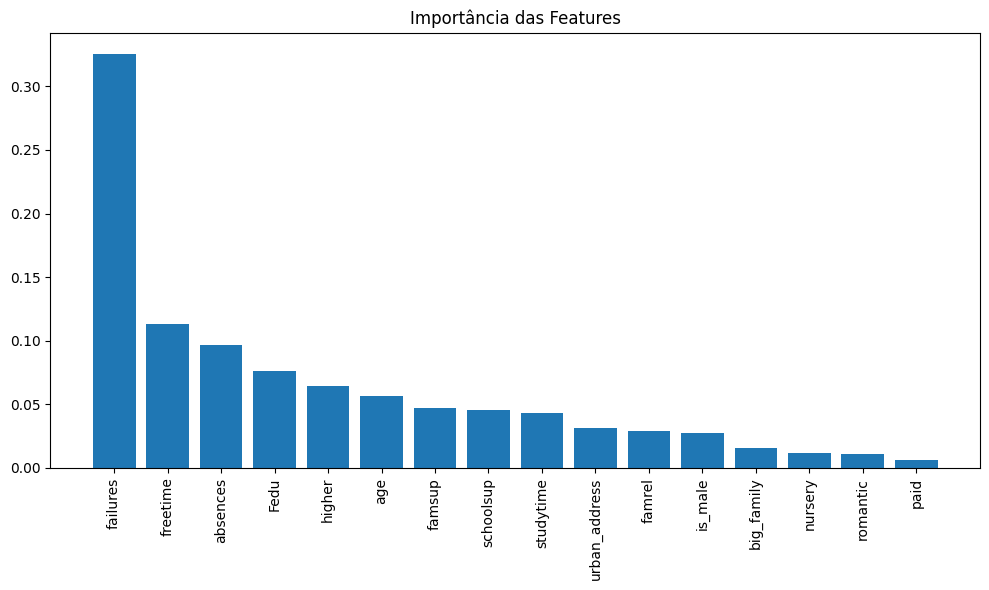

In [80]:
importances = gbr.feature_importances_
feature_names = x.columns
indices = np.argsort(importances)[::-1]

print("\nImportância das features:")
for i in indices:
    print(f"{feature_names[i]}: {importances[i]:.4f}")

plt.figure(figsize=(10, 6))
plt.title("Importância das Features")
plt.bar(range(x.shape[1]), importances[indices], align="center")
plt.xticks(range(x.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()